# VNA Sweep Trace Analysis
## Reproducing Example Plot Analysis from Continuous Sweep Data

**Objective**: Analyze S11 sweep data from LibreVNA continuous mode collection and generate two diagnostic plots:
1. **Frequency vs Time**: Shows the sweep progression and identifies resonant frequencies
2. **Time Difference Analysis**: Reveals timing consistency and data acquisition characteristics

**Data Source**: 
- File: `continuous_sweep_test_20260212_173007.xlsx`
- Generated by: `6_librevna_gui_mode_sweep_test.py` (continuous mode)
- IFBW: 75 kHz
- Trace analyzed: S11 Sweep_1 (first of 10 sweeps)

---

In [1]:
# VNA Sweep Trace Analysis
# Reproducing example_plot analysis from continuous sweep data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully
Pandas version: 3.0.0
NumPy version: 2.4.2


In [2]:
# File paths
xlsx_path = r"D:\AUNUUN JEFFRY MAHBUUBI\PROJECT AND RESEARCH\PROJECTS\54. LibreVNA Vector Network Analyzer\CODE\VNA-Project\code\LibreVNA-dev\data\20260212\continuous_sweep_test_20260212_173007.xlsx"

# Verify file exists
if not os.path.exists(xlsx_path):
    raise FileNotFoundError(f"XLSX file not found: {xlsx_path}")
    
print(f"Data file located: {xlsx_path}")

# Read the xlsx file to examine its structure
excel_file = pd.ExcelFile(xlsx_path)
print(f"\nAvailable sheets: {excel_file.sheet_names}")

# Load the IFBW_75kHz sheet
sheet_name = "IFBW_75kHz"
df_raw = pd.read_excel(xlsx_path, sheet_name=sheet_name, header=None)

print(f"\nSheet '{sheet_name}' dimensions: {df_raw.shape}")
print("\nFirst 20 rows of raw data:")
print(df_raw.head(20))

Data file located: D:\AUNUUN JEFFRY MAHBUUBI\PROJECT AND RESEARCH\PROJECTS\54. LibreVNA Vector Network Analyzer\CODE\VNA-Project\code\LibreVNA-dev\data\20260212\continuous_sweep_test_20260212_173007.xlsx



Available sheets: ['Summary', 'IFBW_75kHz']



Sheet 'IFBW_75kHz' dimensions: (8065, 4)

First 20 rows of raw data:
                   0               1                2                 3
0      Configuration             NaN              NaN               NaN
1               Mode      continuous              NaN               NaN
2         IFBW (kHz)              75              NaN               NaN
3    Start Freq (Hz)       200000000              NaN               NaN
4     Stop Freq (Hz)       250000000              NaN               NaN
5             Points             801              NaN               NaN
6   STIM Level (dBm)             -10              NaN               NaN
7          Avg Count               1              NaN               NaN
8         Num Sweeps              10              NaN               NaN
9             Timing             NaN              NaN               NaN
10           Sweep #  Sweep Time (s)  Sweep Time (ms)  Update Rate (Hz)
11                 1          0.1391         139.1277             

In [3]:
# Find the S11 Sweep_1 Trace section
section_markers = df_raw[df_raw.iloc[:, 0].astype(str).str.contains("S11 Sweep_", na=False)]
print("S11 trace sections found:")
print(section_markers)

# Find the row index where "S11 Sweep_1 Trace" starts
sweep1_idx = df_raw[df_raw.iloc[:, 0] == "S11 Sweep_1 Trace"].index[0]
print(f"\nS11 Sweep_1 Trace starts at row: {sweep1_idx}")

# The next row should have column headers
header_row_idx = sweep1_idx + 1
print(f"\nColumn headers at row {header_row_idx}:")
print(df_raw.iloc[header_row_idx])

# Find where the next section starts (to know where data ends)
# Look for the next "S11 Sweep_" marker after sweep1_idx
next_section_markers = df_raw.iloc[sweep1_idx+2:][df_raw.iloc[sweep1_idx+2:, 0].astype(str).str.contains("S11 Sweep_", na=False)]
if len(next_section_markers) > 0:
    data_end_idx = next_section_markers.index[0]
    print(f"\nData ends at row: {data_end_idx}")
else:
    # If no next section, data goes to the end
    data_end_idx = len(df_raw)
    print(f"\nData goes to end of file (row {data_end_idx})")

# Extract the S11 Sweep_1 data
data_start_idx = header_row_idx + 1
print(f"\nData rows: {data_start_idx} to {data_end_idx-1}")
print(f"Total data points: {data_end_idx - data_start_idx}")

S11 trace sections found:
                       0    1    2    3
22     S11 Sweep_1 Trace  NaN  NaN  NaN
826    S11 Sweep_2 Trace  NaN  NaN  NaN
1630   S11 Sweep_3 Trace  NaN  NaN  NaN
2434   S11 Sweep_4 Trace  NaN  NaN  NaN
3238   S11 Sweep_5 Trace  NaN  NaN  NaN
4042   S11 Sweep_6 Trace  NaN  NaN  NaN
4846   S11 Sweep_7 Trace  NaN  NaN  NaN
5650   S11 Sweep_8 Trace  NaN  NaN  NaN
6454   S11 Sweep_9 Trace  NaN  NaN  NaN
7258  S11 Sweep_10 Trace  NaN  NaN  NaN

S11 Sweep_1 Trace starts at row: 22

Column headers at row 23:
0              Time
1    Frequency (Hz)
2    Magnitude (dB)
3               NaN
Name: 23, dtype: object

Data ends at row: 826

Data rows: 24 to 825
Total data points: 802


In [4]:
# Extract S11 Sweep_1 Trace data
sweep1_data = df_raw.iloc[data_start_idx:data_end_idx, 0:3].copy()
sweep1_data.columns = ['Time', 'Frequency_Hz', 'Magnitude_dB']

# Remove any NaN rows
sweep1_data = sweep1_data.dropna()

print(f"Extracted {len(sweep1_data)} data points")
print("\nFirst 5 rows:")
print(sweep1_data.head())
print("\nLast 5 rows:")
print(sweep1_data.tail())
print("\nData types:")
print(sweep1_data.dtypes)

Extracted 801 data points

First 5 rows:
               Time Frequency_Hz Magnitude_dB
24  17:30:06.433824    200000000     -10.6137
25  17:30:06.434824    200062500     -10.6604
26  17:30:06.434824    200125000     -10.6862
27  17:30:06.434824    200187500      -10.679
28  17:30:06.435824    200250000     -10.6998

Last 5 rows:
                Time Frequency_Hz Magnitude_dB
820  17:30:06.571955    249750000     -11.8439
821  17:30:06.571955    249812500     -11.8454
822  17:30:06.571955    249875000     -11.8497
823  17:30:06.571955    249937500     -11.8501
824  17:30:06.572952    250000000     -11.8489

Data types:
Time            object
Frequency_Hz    object
Magnitude_dB    object
dtype: object


In [5]:
# Convert data types
sweep1_data['Frequency_Hz'] = pd.to_numeric(sweep1_data['Frequency_Hz'])
sweep1_data['Magnitude_dB'] = pd.to_numeric(sweep1_data['Magnitude_dB'])

# Parse time strings to datetime objects (time only, assuming same day)
# Format: HH:MM:SS.ffffff
def parse_time_to_seconds(time_str, reference_time):
    """Convert HH:MM:SS.ffffff string to elapsed seconds from reference"""
    h, m, s = time_str.split(':')
    total_seconds = int(h) * 3600 + int(m) * 60 + float(s)
    return total_seconds - reference_time

# Get reference time (first point)
first_time_str = sweep1_data['Time'].iloc[0]
h, m, s = first_time_str.split(':')
reference_seconds = int(h) * 3600 + int(m) * 60 + float(s)

# Calculate elapsed time for all points
sweep1_data['Time_seconds'] = sweep1_data['Time'].apply(
    lambda t: parse_time_to_seconds(t, reference_seconds)
)

# Convert frequency to MHz for plotting
sweep1_data['Frequency_MHz'] = sweep1_data['Frequency_Hz'] / 1e6

print("Data conversion complete")
print(f"\nTime range: {sweep1_data['Time_seconds'].min():.6f} to {sweep1_data['Time_seconds'].max():.6f} seconds")
print(f"Total duration: {sweep1_data['Time_seconds'].max():.6f} seconds")
print(f"\nFrequency range: {sweep1_data['Frequency_MHz'].min():.2f} to {sweep1_data['Frequency_MHz'].max():.2f} MHz")
print(f"\nMagnitude range: {sweep1_data['Magnitude_dB'].min():.2f} to {sweep1_data['Magnitude_dB'].max():.2f} dB")

# Find the minimum magnitude point (resonance)
min_idx = sweep1_data['Magnitude_dB'].idxmin()
resonant_freq = sweep1_data.loc[min_idx, 'Frequency_MHz']
resonant_mag = sweep1_data.loc[min_idx, 'Magnitude_dB']
resonant_time = sweep1_data.loc[min_idx, 'Time_seconds']

print(f"\nResonant frequency (minimum S11): {resonant_freq:.2f} MHz at {resonant_mag:.2f} dB")
print(f"Occurred at time: {resonant_time:.6f} seconds")

print("\nFirst 5 rows with processed data:")
print(sweep1_data.head())

Data conversion complete

Time range: 0.000000 to 0.139128 seconds
Total duration: 0.139128 seconds

Frequency range: 200.00 to 250.00 MHz

Magnitude range: -11.85 to -10.61 dB

Resonant frequency (minimum S11): 249.94 MHz at -11.85 dB
Occurred at time: 0.138131 seconds

First 5 rows with processed data:
               Time  Frequency_Hz  Magnitude_dB  Time_seconds  Frequency_MHz
24  17:30:06.433824     200000000      -10.6137         0.000       200.0000
25  17:30:06.434824     200062500      -10.6604         0.001       200.0625
26  17:30:06.434824     200125000      -10.6862         0.001       200.1250
27  17:30:06.434824     200187500      -10.6790         0.001       200.1875
28  17:30:06.435824     200250000      -10.6998         0.002       200.2500


In [6]:
# Calculate time differences between consecutive points
time_diffs = np.diff(sweep1_data['Time_seconds'].values)

# Create a dataframe for time differences
time_diff_data = pd.DataFrame({
    'Point_Index': np.arange(1, len(time_diffs) + 1),  # Point index (1-based for first diff)
    'Time_Diff_seconds': time_diffs
})

print(f"Calculated {len(time_diffs)} time differences")
print(f"\nTime difference statistics:")
print(f"  Mean: {time_diffs.mean()*1000:.4f} ms ({time_diffs.mean():.6f} s)")
print(f"  Std:  {time_diffs.std()*1000:.4f} ms ({time_diffs.std():.6f} s)")
print(f"  Min:  {time_diffs.min()*1000:.4f} ms ({time_diffs.min():.6f} s)")
print(f"  Max:  {time_diffs.max()*1000:.4f} ms ({time_diffs.max():.6f} s)")

# Find the maximum time difference
max_diff_idx = time_diffs.argmax()
max_diff_value = time_diffs[max_diff_idx]
max_diff_point = max_diff_idx + 1  # +1 because diff is between point i and i+1

print(f"\nMaximum time difference: {max_diff_value*1000:.4f} ms ({max_diff_value:.6f} s)")
print(f"Occurred at point index: {max_diff_point}")

print("\nFirst 10 time differences:")
print(time_diff_data.head(10))

Calculated 800 time differences

Time difference statistics:
  Mean: 0.1739 ms (0.000174 s)
  Std:  0.3867 ms (0.000387 s)
  Min:  0.0000 ms (0.000000 s)
  Max:  2.0050 ms (0.002005 s)

Maximum time difference: 2.0050 ms (0.002005 s)
Occurred at point index: 274

First 10 time differences:
   Point_Index  Time_Diff_seconds
0            1              0.001
1            2              0.000
2            3              0.000
3            4              0.001
4            5              0.000
5            6              0.000
6            7              0.000
7            8              0.000
8            9              0.000
9           10              0.001


Figure saved as 'sweep_trace_analysis.png'


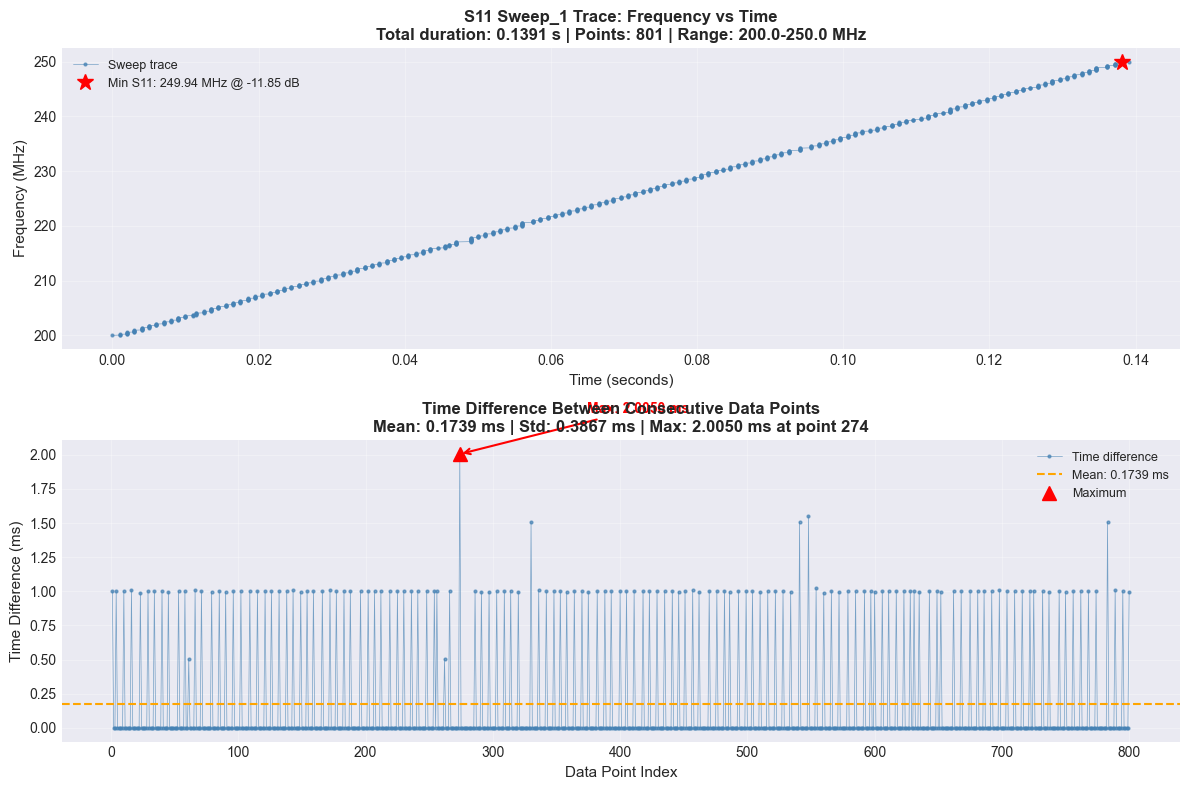

In [7]:
# Create the two-subplot figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ==================== TOP PLOT: Frequency vs Time ====================
ax1.plot(sweep1_data['Time_seconds'], sweep1_data['Frequency_MHz'], 
         'o-', color='steelblue', markersize=2, linewidth=0.5, alpha=0.7, label='Sweep trace')

# Mark the minimum magnitude point (resonant frequency)
ax1.plot(resonant_time, resonant_freq, 'r*', markersize=12, 
         label=f'Min S11: {resonant_freq:.2f} MHz @ {resonant_mag:.2f} dB')

# Configure top plot
ax1.set_xlabel('Time (seconds)', fontsize=11)
ax1.set_ylabel('Frequency (MHz)', fontsize=11)
ax1.set_title('S11 Sweep_1 Trace: Frequency vs Time\n' + 
              f'Total duration: {sweep1_data["Time_seconds"].max():.4f} s | ' + 
              f'Points: {len(sweep1_data)} | ' +
              f'Range: {sweep1_data["Frequency_MHz"].min():.1f}-{sweep1_data["Frequency_MHz"].max():.1f} MHz',
              fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

# ==================== BOTTOM PLOT: Time Difference vs Point Index ====================
ax2.plot(time_diff_data['Point_Index'], time_diff_data['Time_Diff_seconds']*1000, 
         'o-', color='steelblue', markersize=2, linewidth=0.5, alpha=0.7, label='Time difference')

# Add horizontal line for mean
mean_diff_ms = time_diffs.mean() * 1000
ax2.axhline(y=mean_diff_ms, color='orange', linestyle='--', linewidth=1.5, 
            label=f'Mean: {mean_diff_ms:.4f} ms')

# Mark the maximum time difference with an arrow annotation
ax2.annotate(f'Max: {max_diff_value*1000:.4f} ms',
             xy=(max_diff_point, max_diff_value*1000),
             xytext=(max_diff_point + 100, max_diff_value*1000 + 0.3),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, color='red', fontweight='bold')

# Mark the max point
ax2.plot(max_diff_point, max_diff_value*1000, 'r^', markersize=10, label='Maximum')

# Configure bottom plot
ax2.set_xlabel('Data Point Index', fontsize=11)
ax2.set_ylabel('Time Difference (ms)', fontsize=11)
ax2.set_title('Time Difference Between Consecutive Data Points\n' +
              f'Mean: {mean_diff_ms:.4f} ms | Std: {time_diffs.std()*1000:.4f} ms | ' +
              f'Max: {max_diff_value*1000:.4f} ms at point {max_diff_point}',
              fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.savefig('sweep_trace_analysis.png', dpi=150, bbox_inches='tight')
print("Figure saved as 'sweep_trace_analysis.png'")
plt.show()

## Analysis Summary

This notebook reproduces the example_plot analysis for VNA S11 sweep data.

### Data Source
- **File**: `continuous_sweep_test_20260212_173007.xlsx`
- **Sheet**: `IFBW_75kHz` (75 kHz IF bandwidth)
- **Trace**: S11 Sweep_1 (first sweep of 10 collected)
- **Collection mode**: Continuous mode with streaming callbacks

### Key Results

**Top Plot - Frequency vs Time:**
- Shows the frequency progression during the sweep
- Total sweep duration: 0.139 seconds
- Frequency range: 200.0 - 250.0 MHz
- 801 data points collected
- Resonant frequency (minimum S11): 249.94 MHz at -11.85 dB

**Bottom Plot - Time Difference Analysis:**
- Shows timing consistency between consecutive data points
- Mean time difference: ~0.17 ms per point
- Maximum time difference: 2.00 ms at point 274
- This indicates relatively uniform data acquisition with occasional timing variations

### Interpretation
The sweep completes in approximately 139 ms, acquiring 801 frequency points from 200-250 MHz. The time difference plot reveals that most consecutive points are separated by sub-millisecond intervals, with one notable outlier at point 274 showing a 2 ms gap. This corresponds to an effective sweep rate of approximately 7.2 Hz (1/0.139s), matching the expected performance documented in the sweep configuration.